In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.ensemble import AdaBoostClassifier

In [2]:
df = pd.read_csv("./chip_dataset.csv")

In [3]:
# №1 Вивести назви колонок і розмір датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

In [4]:
# №2 Опрацювати пропуски
df = df.drop(["Unnamed: 0", "Vendor", "FP16 GFLOPS", "FP32 GFLOPS", "FP64 GFLOPS"], axis=1)

In [5]:
df.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown


In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3422 entries, 0 to 4851
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                3422 non-null   object 
 1   Type                   3422 non-null   object 
 2   Release Date           3422 non-null   object 
 3   Process Size (nm)      3422 non-null   float64
 4   TDP (W)                3422 non-null   float64
 5   Die Size (mm^2)        3422 non-null   float64
 6   Transistors (million)  3422 non-null   float64
 7   Freq (MHz)             3422 non-null   float64
 8   Foundry                3422 non-null   object 
dtypes: float64(5), object(4)
memory usage: 267.3+ KB


<AxesSubplot: xlabel='Release Date', ylabel='Foundry'>

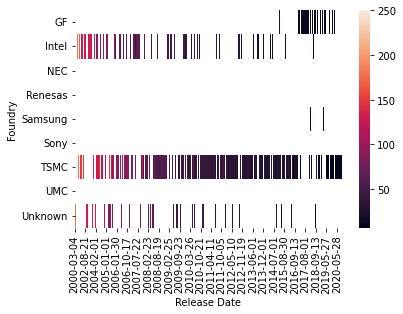

In [8]:
# №3 Візуалізувати дані
sns.heatmap(df.pivot_table(index="Foundry",columns="Release Date", values="Process Size (nm)"))

<AxesSubplot: xlabel='Freq (MHz)', ylabel='Count'>

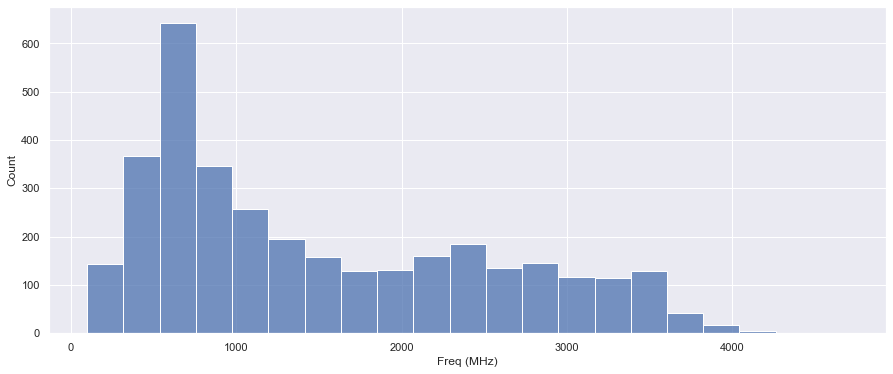

In [9]:
sns.set(rc={"figure.figsize" : (15,6)})
sns.histplot(x="Freq (MHz)", data=df)

<AxesSubplot: xlabel='TDP (W)', ylabel='Count'>

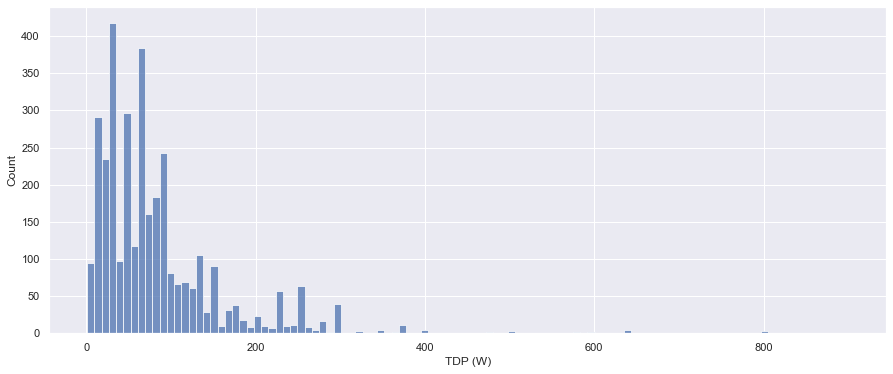

In [10]:
sns.histplot(x="TDP (W)", data=df)

<AxesSubplot: xlabel='Type', ylabel='Freq (MHz)'>

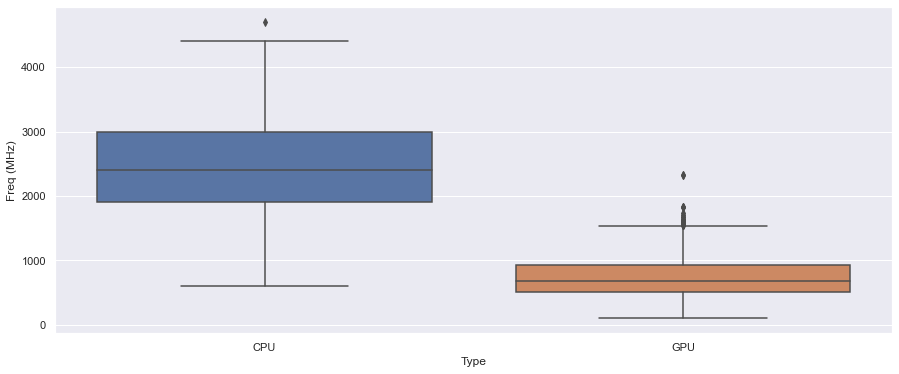

In [11]:
sns.boxplot(x="Type", y="Freq (MHz)", data=df)

<AxesSubplot: xlabel='Type', ylabel='Process Size (nm)'>

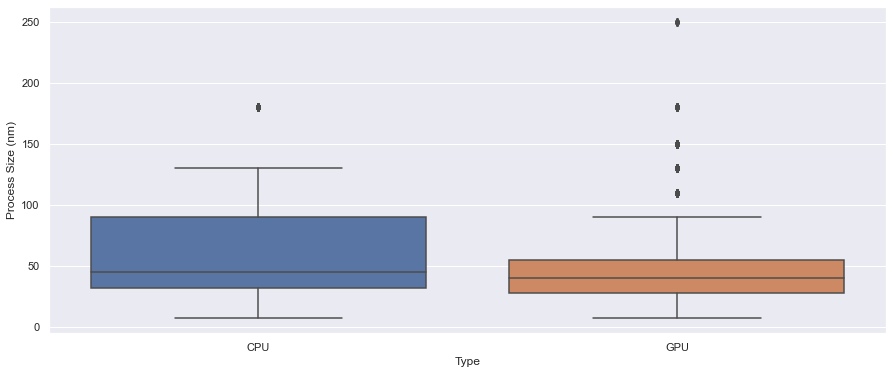

In [12]:
sns.boxplot(x="Type", y="Process Size (nm)", data=df)

In [13]:
# №4 Нормалізувати дані
df.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown
5,Intel Xeon E5-2470 v2,CPU,2013-09-01,22.0,95.0,160.0,1400.0,2400.0,Intel


In [14]:
df=df.apply(sklearn.preprocessing.LabelEncoder().fit_transform)
df.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry
0,131,0,244,13,44,15,32,401,8
1,114,0,1011,4,34,81,154,437,8
3,2077,0,768,7,78,70,124,381,1
4,502,0,580,11,111,115,104,449,8
5,2076,0,768,7,92,70,124,412,1


In [15]:
# №5.1 kNN
X = df.drop(["Product", "Type", "Release Date", "Die Size (mm^2)", "Transistors (million)", "Foundry"], axis=1)
y = df["Foundry"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)

In [17]:
print(confusion_matrix(y_test, pred))

[[ 46   1   0   0   0   4   0   1]
 [  0 115   0   0   0   1   0  26]
 [  0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   1   0   0]
 [  2   0   0   0   7   2   0   0]
 [ 11   0   0   0   0 299   2   1]
 [  0   0   0   0   0   0   1   0]
 [  0  37   0   0   0   3   0 124]]


In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        52
           1       0.75      0.81      0.78       142
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       1.00      0.64      0.78        11
           6       0.96      0.96      0.96       313
           7       0.33      1.00      0.50         1
           8       0.82      0.76      0.78       164

    accuracy                           0.86       685
   macro avg       0.58      0.63      0.58       685
weighted avg       0.87      0.86      0.86       685



C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
print(accuracy_score(y_test,pred))

0.8642335766423358


In [20]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

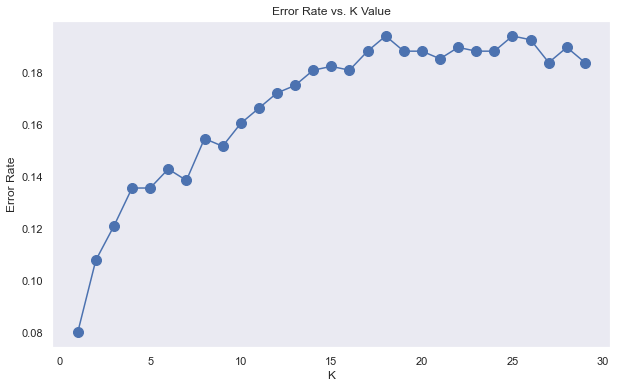

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [22]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[ 45   1   0   0   0   6   0   0]
 [  1 127   0   0   0   1   0  13]
 [  0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   1   0   0]
 [  2   0   0   0   6   3   0   0]
 [ 16   0   0   0   2 294   1   0]
 [  0   0   0   0   0   1   0   0]
 [  0  55   0   0   0   6   0 103]]

              precision    recall  f1-score   support

           0       0.70      0.87      0.78        52
           1       0.69      0.89      0.78       142
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.75      0.55      0.63        11
           6       0.94      0.94      0.94       313
           7       0.00      0.00      0.00         1
           8       0.89      0.63      0.74       164

    accuracy                           0.84       685
   macro avg       0.50      0.48      0.48       685
weighted avg       0.85      0.84      0.84       685



C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# №5.2 Дерево прийняття рішень
X = df.drop(["Product", "Type", "Release Date", "Die Size (mm^2)", "Transistors (million)", "Foundry"], axis=1)
y = df["Foundry"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [24]:
print(type(X), type(y))
print(X_train.shape, y_train.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(2737, 3) (2737,)


In [25]:
model = DecisionTreeClassifier(criterion='gini')

In [26]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
y_pred = model.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.91      0.87      0.89       157
           4       0.92      1.00      0.96        12
           5       0.25      1.00      0.40         1
           6       0.96      0.98      0.97       347
           7       0.00      0.00      0.00         7
           8       0.86      0.86      0.86       125

    accuracy                           0.92       685
   macro avg       0.69      0.81      0.72       685
weighted avg       0.92      0.92      0.92       685



In [29]:
print(confusion_matrix(y_test, y_pred))

[[ 35   0   1   0   0   0   0]
 [  1 136   0   0   2   0  18]
 [  0   0  12   0   0   0   0]
 [  0   0   0   1   0   0   0]
 [  2   0   0   3 341   1   0]
 [  0   0   0   0   7   0   0]
 [  0  14   0   0   4   0 107]]


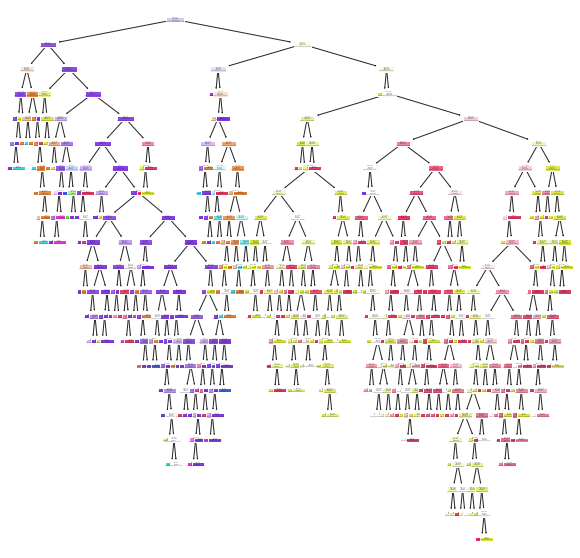

In [30]:
plt.figure(figsize = (10, 10))
plot_tree(model, filled = True)
plt.show()

In [31]:
# №5.3 SVM
X = df.drop(["Product", "Type", "Release Date", "Die Size (mm^2)", "Transistors (million)", "Foundry"], axis=1)
y = df["Foundry"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test)

In [33]:
model = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')
model.fit(scaled_X_train,y_train)

SVC(gamma=1.0)

In [34]:
y_pred = model.predict(scaled_X_test)

In [35]:
print(confusion_matrix(y_test, y_pred))

[[ 41   0   0   0   0   7   0   0]
 [  1 108   0   0   0   3   0  31]
 [  0   0   0   0   0   1   0   0]
 [  1   0   0   1   0   2   0   0]
 [  0   0   0   0   0   3   0   0]
 [  9   0   0   1   0 328   0   0]
 [  0   0   0   0   0   2   0   0]
 [  0  41   0   0   0   2   0 103]]


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        48
           1       0.72      0.76      0.74       143
           2       0.00      0.00      0.00         1
           4       0.50      0.25      0.33         4
           5       0.00      0.00      0.00         3
           6       0.94      0.97      0.96       338
           7       0.00      0.00      0.00         2
           8       0.77      0.71      0.74       146

    accuracy                           0.85       685
   macro avg       0.47      0.44      0.45       685
weighted avg       0.84      0.85      0.84       685



C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(scaled_X_train,y_train)

C:\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [38]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [39]:
grid.best_estimator_

SVC(C=1000, gamma=1)

In [40]:
grid_predictions = grid.predict(scaled_X_test)
print(confusion_matrix(y_test,grid_predictions))

[[ 46   1   0   0   0   1   0   0]
 [  0 126   0   0   0   0   0  17]
 [  0   0   0   0   0   1   0   0]
 [  0   0   0   4   0   0   0   0]
 [  0   0   0   0   0   3   0   0]
 [  2   0   0   0   0 330   1   5]
 [  0   0   0   0   0   1   1   0]
 [  0  31   0   0   0   1   0 114]]


In [41]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        48
           1       0.80      0.88      0.84       143
           2       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         3
           6       0.98      0.98      0.98       338
           7       0.50      0.50      0.50         2
           8       0.84      0.78      0.81       146

    accuracy                           0.91       685
   macro avg       0.63      0.64      0.64       685
weighted avg       0.90      0.91      0.90       685



C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
# №5.4 Random Forest
X = df.drop(["Product", "Type", "Release Date", "Die Size (mm^2)", "Transistors (million)", "Foundry"], axis=1)
y = df["Foundry"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [43]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)
rfc = RandomForestClassifier()
model=rfc.fit(X_train_scaled, y_train)
display(model.score(X_train_scaled, y_train))

0.9810010960906101

In [44]:
y_pred=model.predict(X_test_scaled)
print(sklearn.metrics.accuracy_score(y_test, y_pred))

0.9065693430656935


In [45]:
print(confusion_matrix(y_test, y_pred))

[[ 39   1   0   0   2   0   0]
 [  1 139   0   0   0   0  20]
 [  0   0   0   0   1   0   0]
 [  1   0   0   4   3   0   0]
 [  0   1   0   0 336   0   1]
 [  0   0   0   0   8   1   0]
 [  0  23   0   0   2   0 102]]


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.85      0.87      0.86       160
           3       0.00      0.00      0.00         1
           4       1.00      0.50      0.67         8
           6       0.95      0.99      0.97       338
           7       1.00      0.11      0.20         9
           8       0.83      0.80      0.82       127

    accuracy                           0.91       685
   macro avg       0.80      0.60      0.64       685
weighted avg       0.91      0.91      0.90       685



C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# №5.5 AdaBoost
X = df.drop(["Product", "Type", "Release Date", "Die Size (mm^2)", "Transistors (million)", "Foundry"], axis=1)
y = df["Foundry"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [48]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(sklearn.metrics.accuracy_score(y_test, y_pred))

0.7021897810218978


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.90      0.59        58
           1       0.66      0.57      0.61       166
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         3
           6       0.90      0.83      0.86       318
           7       0.00      0.00      0.00         3
           8       0.53      0.58      0.56       121

    accuracy                           0.70       685
   macro avg       0.32      0.36      0.33       685
weighted avg       0.71      0.70      0.70       685



C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
print(confusion_matrix(y_test, y_pred))

[[ 52   0   0   0   0   6   0   0]
 [  5  94   0   0   0   6   0  61]
 [  0   0   0   0   0   1   0   0]
 [ 15   0   0   0   0   0   0   0]
 [  0   0   0   0   0   3   0   0]
 [ 45   8   0   0   0 265   0   0]
 [  0   0   0   0   0   3   0   0]
 [  0  40   0   0   0  11   0  70]]
